In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# custom colors
colors = [(0/255.,191/255.,196/255.), (248/255.,118/255.,109/255.), (150/255.,120/255.,170/255.), (200/255.,150/255.,120/255.)]

In [2]:
def full_df(path: str):
    #Creates and returns a Pandas DataFrame from all logs in `path`
    experiments = [os.path.join(dp, f) for dp, dn, filenames
                   in os.walk(path) for f in filenames
                   if os.path.splitext(f)[1] == '.csv']
    experiments = {str(e): e for e in experiments}
    full_df = pd.DataFrame()
    for exp_name, exp_path in experiments.items():
        if 'aggregate_log' in exp_name:
            continue
        df = pd.read_csv(exp_path)
        df['exp'] = exp_name
        full_df = pd.concat([full_df, df])
    return full_df

In [3]:
path = '/home/kohring/bnelearn/experiments/pso-t'
single_item_sym_npga = os.path.join(path, 'ESPGLearner', 'single_item/first_price/uniform/symmetric')
single_item_sym_npga_df = full_df(single_item_sym_npga)
single_item_sym_pso = os.path.join(path, 'PSOLearner', 'single_item/first_price/uniform/symmetric')
single_item_sym_pso_df = full_df(single_item_sym_pso)
    
single_item_asym_npga = os.path.join(path, 'ESPGLearner', 'single_item/first_price/uniform/asymmetric')
single_item_asym_npga_df = full_df(single_item_asym_npga)
single_item_asym_pso = os.path.join(path, 'PSOLearner', 'single_item/first_price/uniform/asymmetric')
single_item_asym_pso_df = full_df(single_item_asym_pso)
    
llg_npga = os.path.join(path, 'ESPGLearner', 'LLG')
llg_npga_df = full_df(llg_npga)
llg_pso = os.path.join(path, 'PSOLearner', 'LLG')
llg_pso_df = full_df(llg_pso)

llgfull_npga = os.path.join(path, 'ESPGLearner', 'LLGFull')
llgfull_npga_df = full_df(llg_npga)
llgfull_pso = os.path.join(path, 'PSOLearner', 'LLGFull')
llgfull_pso_df = full_df(llg_pso)

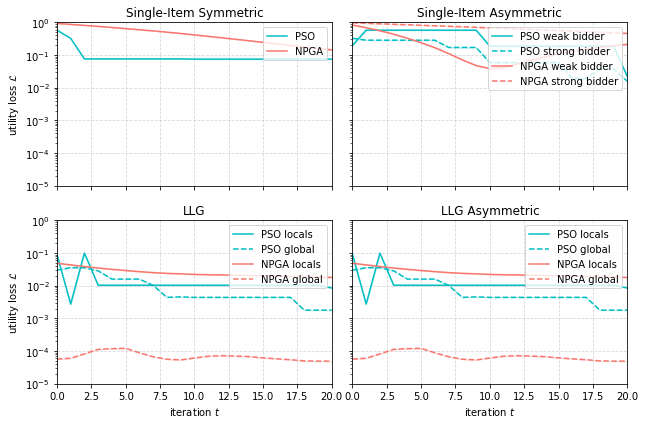

In [6]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(9, 6))
axs = axs.flat

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

agg = [percentile(25), percentile(75), 'median']

color_pso = colors[0]
color_npga = colors[1]

# single-item sym -------------------------------------------------------------
# pso
df = single_item_sym_pso_df
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
axs[0].plot(x, y, '-', label='PSO', color=color_pso)
axs[0].fill_between(x, mi, ma, alpha=.2, color=color_pso)

# npga
df = single_item_sym_npga_df
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
axs[0].plot(x, y, '-', label='NPGA', color=color_npga)
axs[0].fill_between(x, mi, ma, alpha=.2, color=color_npga)

# single item asym ------------------------------------------------------------
# pso bidder0
df = single_item_asym_pso_df
df = df[df['subrun'] == 'bidder0']
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
axs[1].plot(x, y, '-', label='PSO weak bidder', color=color_pso)
axs[1].fill_between(x, mi, ma, alpha=.2, color=color_pso)

# pso bidder1
df = single_item_asym_pso_df
df = df[df['subrun'] == 'bidder1']
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
axs[1].plot(x, y, '--', label='PSO strong bidder', color=color_pso)
axs[1].fill_between(x, mi, ma, alpha=.2, color=color_pso)

# npga bidder0
df = single_item_asym_npga_df
df = df[df['subrun'] == 'bidder0']
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
axs[1].plot(x, y, '-', label='NPGA weak bidder', color=color_npga)
axs[1].fill_between(x, mi, ma, alpha=.2, color=color_npga)

# npga bidder1
df = single_item_asym_npga_df
df = df[df['subrun'] == 'bidder1']
df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
df_sub = df_sub.groupby('epoch').agg(agg)
df_sub.columns = ['min', 'max', 'mean']
df_sub.head()
x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
axs[1].plot(x, y, '--', label='NPGA strong bidder', color=color_npga)
axs[1].fill_between(x, mi, ma, alpha=.2, color=color_npga)

# LLG -------------------------------------------------------------------------
for i, dfs in zip(
        [2, 3],
        [[llg_pso_df, llg_npga_df], [llgfull_pso_df, llgfull_npga_df]]
    ):
    # pso local
    df = dfs[0]
    df = df[df['subrun'] == 'locals']
    df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
    df_sub = df_sub.groupby('epoch').agg(agg)
    df_sub.columns = ['min', 'max', 'mean']
    df_sub.head()
    x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
    axs[i].plot(x, y, '-', label='PSO locals', color=color_pso)
    axs[i].fill_between(x, mi, ma, alpha=.2, color=color_pso)

    # pso global
    df = dfs[0]
    df = df[df['subrun'] == 'global']
    df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
    df_sub = df_sub.groupby('epoch').agg(agg)
    df_sub.columns = ['min', 'max', 'mean']
    df_sub.head()
    x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
    axs[i].plot(x, y, '--', label='PSO global', color=color_pso)
    axs[i].fill_between(x, mi, ma, alpha=.2, color=color_pso)

    # npga local
    df = dfs[1]
    df = df[df['subrun'] == 'locals']
    df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
    df_sub = df_sub.groupby('epoch').agg(agg)
    df_sub.columns = ['min', 'max', 'mean']
    df_sub.head()
    x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
    axs[i].plot(x, y, '-', label='NPGA locals', color=color_npga)
    axs[i].fill_between(x, mi, ma, alpha=.2, color=color_npga)

    # npga global
    df = dfs[1]
    df = df[df['subrun'] == 'global']
    df_sub = df[df['tag'] == 'eval/epsilon_relative'][['epoch', 'value']]
    df_sub = df_sub.groupby('epoch').agg(agg)
    df_sub.columns = ['min', 'max', 'mean']
    df_sub.head()
    x, y, mi, ma = df_sub.index, df_sub['mean'], df_sub['min'], df_sub['max']
    axs[i].plot(x, y, '--', label='NPGA global', color=color_npga)
    axs[i].fill_between(x, mi, ma, alpha=.2, color=color_npga)

# joint plot ------------------------------------------------------------------
axs[0].set_title('Single-Item Symmetric')
axs[1].set_title('Single-Item Asymmetric')
axs[2].set_title('LLG')
axs[3].set_title('LLG Asymmetric')

# plot
for i, ax in enumerate(axs):
    ax.set_yscale('log')
    ax.set_xlim([0, max(x)])
    ax.set_ylim([1e-5, 1e0])
    ax.grid(which='major', alpha=.5, linestyle='--')
    if i in [2, 3]:
        ax.set_xlabel('iteration $t$')
    if i in [0, 2]:
        ax.set_ylabel('utility loss $\mathcal{L}$')
    ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('learning_progress.pdf', format='pdf')
plt.show()